In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
df = pd.read_csv('data/data_final_preprocessed.csv')
df.head(5)

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,preapprove_flg,child_flg,approval_flg,bundle_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,NaN,NaN,2,0,1.0,1,0,0,0
1,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,1,NaN,1,0,0,0
2,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,0,NaN,1,0,0,0
3,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,NaN,NaN,4,0,1.0,0,1,0,0
4,505902204,19.0,1.0,town,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,Россия,Холост/не замужем,0,0,0.0,0,0,1,0


In [9]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df_filter = df[(df['age'] >= 18) & (df['age'] <= upper_bound)]

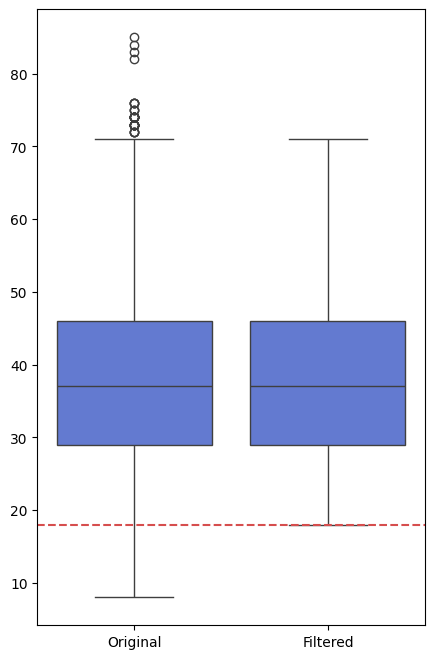

In [20]:
df_combined = pd.DataFrame({
    'Original': df['age'],
    'Filtered': df_filter['age']
})

# Создаем боксплот
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_combined, color='#5170E2')
plt.axhline(y=18, color='#D64E4E', linestyle='--', label='y = 18')

# Убираем подписи осей
plt.xlabel('')
plt.ylabel('')

# Показываем график
plt.title('')
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()